In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Soyabean Data set!

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/soyabean.csv')

In [ ]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,08-12-2015,Andhra Pradesh
1,Chittor,Madanapalli,Soyabean,Local,Medium,2600.0,3000.0,2700.0,07-12-2015,Andhra Pradesh
2,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,30-11-2015,Andhra Pradesh
3,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,29-11-2015,Andhra Pradesh
4,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,28-11-2015,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
719512,Agra,Samsabad,Soyabean,Other,FAQ,2075.0,2154.0,2100.0,01-08-2009,Uttar Pradesh
719513,Bankura,Bishnupur(Bankura),Soyabean,Other,FAQ,0.0,5200.0,5200.0,02-11-2013,West Bengal
719514,Bankura,Bishnupur(Bankura),Soyabean,Other,FAQ,0.0,5300.0,5300.0,09-10-2013,West Bengal
719515,Bankura,Bishnupur(Bankura),Soyabean,Other,FAQ,0.0,5400.0,5400.0,03-09-2013,West Bengal


# Pre-processing

In [ ]:
df.shape

(719517, 10)

In [ ]:
rows = df.shape[0]
rows

719517

In [ ]:
cols = df.shape[1]
cols

10

In [ ]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
State                        False
dtype: bool

## Dealing with Null Values!

In [ ]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [ ]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!
Column No: 10 = State has 0 Null values!


In [ ]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 183 unique values!
The column Market Name has 789 unique values!
The column Commodity has 1 unique values!
The column Variety has 6 unique values!
The column Grade has 4 unique values!
The column Min Price (Rs./Quintal) has 6520 unique values!
The column Max Price (Rs./Quintal) has 7847 unique values!
The column Modal Price (Rs./Quintal) has 7852 unique values!
The column Price Date has 5112 unique values!
The column State has 23 unique values!


In [ ]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date', 'State'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date', 'state'],
      dtype='object')


In [ ]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state
0,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,08-12-2015,Andhra Pradesh
1,Chittor,Madanapalli,Soyabean,Local,Medium,2600.0,3000.0,2700.0,07-12-2015,Andhra Pradesh
2,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,30-11-2015,Andhra Pradesh
3,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,29-11-2015,Andhra Pradesh
4,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,28-11-2015,Andhra Pradesh


In [ ]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [ ]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year
0,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,08-12-2015,Andhra Pradesh,12,2015
1,Chittor,Madanapalli,Soyabean,Local,Medium,2600.0,3000.0,2700.0,07-12-2015,Andhra Pradesh,12,2015
2,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,30-11-2015,Andhra Pradesh,11,2015


In [ ]:
df['price_date'].dtype


dtype('O')

In [ ]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
state                                object
month                                 int64
year                                  int64
dtype: object


In [ ]:
df_copy = df

# Encoding Columns

## district Name

In [ ]:
df['district_name'].nunique()

183

In [ ]:
value_counts = df['district_name'].value_counts()

In [ ]:
value_counts

Shajapur           28337
Buldhana           21784
Rajgarh            21593
Ujjain             20505
Sagar              17547
                   ...  
Cuddalore              1
Ramanathapuram         1
Churu                  1
Lohardaga              1
Hanumangarh            1
Name: district_name, Length: 183, dtype: int64

In [ ]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [ ]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded
0,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-12-08,Andhra Pradesh,12,2015,5
1,Chittor,Madanapalli,Soyabean,Local,Medium,2600.0,3000.0,2700.0,2015-12-07,Andhra Pradesh,12,2015,5
2,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-30,Andhra Pradesh,11,2015,5
3,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-29,Andhra Pradesh,11,2015,5
4,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-28,Andhra Pradesh,11,2015,5


## market name

In [ ]:
df['market_name'].nunique()

789

In [ ]:
value_counts = df['market_name'].value_counts()

In [ ]:
value_counts

Berasia       4758
Dahod         3756
Bhopal        3753
Kota          3732
Khachrod      3689
              ... 
Bellary          1
Lohardaga        1
Pavani           1
Bhoom            1
Tonk             1
Name: market_name, Length: 789, dtype: int64

In [ ]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [ ]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded
0,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-12-08,Andhra Pradesh,12,2015,5,5
1,Chittor,Madanapalli,Soyabean,Local,Medium,2600.0,3000.0,2700.0,2015-12-07,Andhra Pradesh,12,2015,5,5
2,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-30,Andhra Pradesh,11,2015,5,5
3,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-29,Andhra Pradesh,11,2015,5,5
4,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-28,Andhra Pradesh,11,2015,5,5


In [ ]:
df = df.drop('commodity',axis=1)

## variety

In [ ]:
df['variety'].nunique()

6

In [ ]:
value_counts = df['variety'].value_counts()

In [ ]:
value_counts

Yellow       310981
Other        300723
Soyabeen      58458
Local         47614
Black          1664
Sup              77
Name: variety, dtype: int64

In [ ]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [ ]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-12-08,Andhra Pradesh,12,2015,5,5,58458
1,Chittor,Madanapalli,Local,Medium,2600.0,3000.0,2700.0,2015-12-07,Andhra Pradesh,12,2015,5,5,47614
2,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-30,Andhra Pradesh,11,2015,5,5,58458
3,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-29,Andhra Pradesh,11,2015,5,5,58458
4,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-28,Andhra Pradesh,11,2015,5,5,58458


## grade

In [ ]:
df['grade'].unique()

array(['Medium ', 'FAQ ', 'Large ', 'Small '], dtype=object)

In [ ]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        710910
Medium       8202
Large         370
Small          35
Name: grade, dtype: int64

In [ ]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [ ]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-12-08,Andhra Pradesh,12,2015,5,5,58458,8202
1,Chittor,Madanapalli,Local,Medium,2600.0,3000.0,2700.0,2015-12-07,Andhra Pradesh,12,2015,5,5,47614,8202
2,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-30,Andhra Pradesh,11,2015,5,5,58458,8202
3,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-29,Andhra Pradesh,11,2015,5,5,58458,8202
4,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-28,Andhra Pradesh,11,2015,5,5,58458,8202


## state

In [ ]:
df['state'].unique()

array(['Andhra Pradesh', 'Bihar', 'Chattisgarh', 'NCT of Delhi',
       'Gujarat', 'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Karnataka',
       'Kerala', 'Maharashtra', 'Manipur', 'Madhya Pradesh', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Telangana',
       'Tamil Nadu', 'Uttrakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [ ]:
value_counts = df['state'].value_counts()
value_counts

Madhya Pradesh      368156
Maharashtra         215094
Rajasthan            58969
Karnataka            22369
Chattisgarh          20091
Gujarat              19838
Telangana             6750
Manipur               3884
Uttar Pradesh         3052
Uttrakhand             812
Tamil Nadu             134
Nagaland               127
Punjab                 123
Himachal Pradesh        41
Haryana                 20
Mizoram                 18
Bihar                   14
Odisha                  12
Andhra Pradesh           5
West Bengal              4
Kerala                   2
Jharkhand                1
NCT of Delhi             1
Name: state, dtype: int64

In [ ]:
state_frequency = df['state'].value_counts(normalize=False)

# Create a new column with encoded values
df['state_encoded'] = df['state'].map(state_frequency)

In [ ]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-12-08,Andhra Pradesh,12,2015,5,5,58458,8202,5
1,Chittor,Madanapalli,Local,Medium,2600.0,3000.0,2700.0,2015-12-07,Andhra Pradesh,12,2015,5,5,47614,8202,5
2,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-30,Andhra Pradesh,11,2015,5,5,58458,8202,5
3,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-29,Andhra Pradesh,11,2015,5,5,58458,8202,5
4,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-28,Andhra Pradesh,11,2015,5,5,58458,8202,5


# Taking only the Encoded columns

In [ ]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [ ]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,5,5,58458,8202,5,12,2015,2015-12-08,2600.0,3000.0,2700.0
1,5,5,47614,8202,5,12,2015,2015-12-07,2600.0,3000.0,2700.0
2,5,5,58458,8202,5,11,2015,2015-11-30,2600.0,3000.0,2700.0
3,5,5,58458,8202,5,11,2015,2015-11-29,2600.0,3000.0,2700.0
4,5,5,58458,8202,5,11,2015,2015-11-28,2600.0,3000.0,2700.0
5,10,10,300723,710910,14,11,2009,2009-11-07,2200.0,2250.0,2225.0
6,10,10,300723,710910,14,11,2009,2009-11-06,2150.0,2200.0,2190.0
7,10,10,300723,710910,14,9,2009,2009-09-09,2000.0,2010.0,2005.0


# Heat Map

<ipython-input-45-f636cb7d937b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


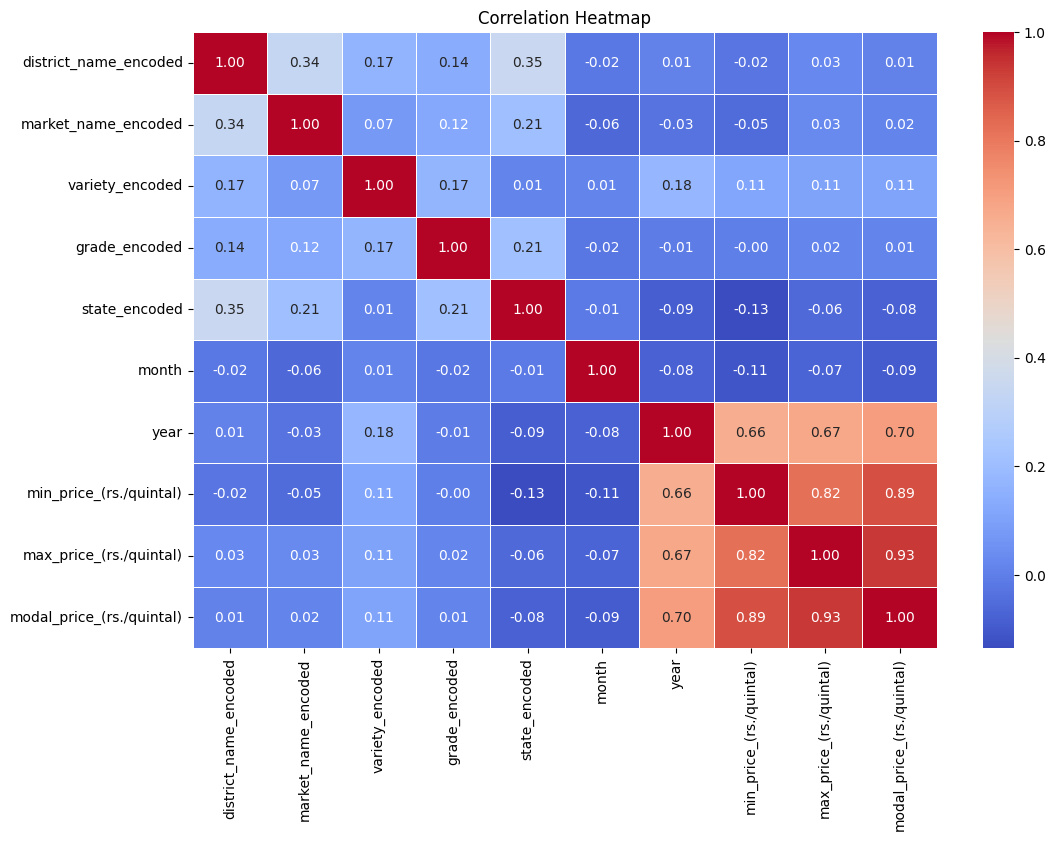

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [ ]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,5,5,58458,8202,5,12,2015,2015-12-08,2600.0,3000.0,2700.0
1,5,5,47614,8202,5,12,2015,2015-12-07,2600.0,3000.0,2700.0
2,5,5,58458,8202,5,11,2015,2015-11-30,2600.0,3000.0,2700.0
3,5,5,58458,8202,5,11,2015,2015-11-29,2600.0,3000.0,2700.0
4,5,5,58458,8202,5,11,2015,2015-11-28,2600.0,3000.0,2700.0


# Outlier Removing rows

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]



In [ ]:
df_encoded = df_cleaned

## Standardizing values (min-max scalar)

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
5,10,10,300723,710910,14,11,2009,2009-11-07,2200.0,2250.0,2225.0
6,10,10,300723,710910,14,11,2009,2009-11-06,2150.0,2200.0,2190.0
7,10,10,300723,710910,14,9,2009,2009-09-09,2000.0,2010.0,2005.0
8,10,10,300723,710910,14,9,2009,2009-09-08,2000.0,2075.0,2050.0
9,10,10,300723,710910,14,9,2009,2009-09-06,2000.0,2010.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...
719512,65,65,300723,710910,3052,8,2009,2009-08-01,2075.0,2154.0,2100.0
719513,4,4,300723,710910,4,11,2013,2013-11-02,0.0,5200.0,5200.0
719514,4,4,300723,710910,4,10,2013,2013-10-09,0.0,5300.0,5300.0
719515,4,4,300723,710910,4,9,2013,2013-09-03,0.0,5400.0,5400.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


<ipython-input-51-89ab9681e745>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
5,0.000318,0.001892,0.967006,0.0,0.000035,11,2009,2009-11-07,2200.0,2250.0,2225.0
6,0.000318,0.001892,0.967006,0.0,0.000035,11,2009,2009-11-06,2150.0,2200.0,2190.0
7,0.000318,0.001892,0.967006,0.0,0.000035,9,2009,2009-09-09,2000.0,2010.0,2005.0
8,0.000318,0.001892,0.967006,0.0,0.000035,9,2009,2009-09-08,2000.0,2075.0,2050.0
9,0.000318,0.001892,0.967006,0.0,0.000035,9,2009,2009-09-06,2000.0,2010.0,2005.0


## Forward Stepwise Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [ ]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'state_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [ ]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.4947
Selected feature: state_encoded, Score: 0.4983
Selected feature: month, Score: 0.5005
Selected feature: market_name_encoded, Score: 0.5025
Selected feature: variety_encoded, Score: 0.5027
Selected feature: district_name_encoded, Score: 0.5028
Selected feature: grade_encoded, Score: 0.5028
['year', 'state_encoded', 'month', 'market_name_encoded', 'variety_encoded', 'district_name_encoded', 'grade_encoded']


### All the features are closely important

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[3079.35381786, 3377.02937763, 3258.85050815],
       [1711.66928426, 1977.66782022, 1922.13597831],
       [2865.67042007, 3452.84463826, 3275.73347373],
       ...,
       [4011.31988487, 4668.65371489, 4454.2768004 ],
       [3351.34786893, 4004.47738324, 3811.34675304],
       [3337.96016317, 4225.85551361, 3963.76951852]])

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 485.02965209462747
Root Mean Square error is: 657.311451887993
R2 score is: 0.5023265886560745


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 132.78594687858842
Root Mean Square error is: 246.78389188309956
R2 score is: 0.9280168615821568


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(
    n_estimators=200,  # Reduced number of trees
    max_depth=30,  # Reduced maximum depth
    random_state=42,
    bootstrap=True,
    warm_start=True,  # Enable incremental training
    n_jobs=-1  # Utilize all CPU cores
)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)


In [ ]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 131.60522617075245
Root Mean Square error is: 241.11820547705724
R2 score is: 0.9312287635464754


## XgBoost Regression

In [ ]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=200, learning_rate=0.37,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 148.26044970326078
Root Mean Square error is: 253.71503483970085
R2 score is: 0.9236568205481115


## KNN Regression

In [77]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 141.32753556506955
Root Mean Square error is: 258.4552434993529
R2 score is: 0.9210427120657801


# Datasets of Soyabean

## Main

In [ ]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-12-08,Andhra Pradesh,12,2015,5,5,58458,8202,5
1,Chittor,Madanapalli,Local,Medium,2600.0,3000.0,2700.0,2015-12-07,Andhra Pradesh,12,2015,5,5,47614,8202,5
2,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-30,Andhra Pradesh,11,2015,5,5,58458,8202,5
3,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-29,Andhra Pradesh,11,2015,5,5,58458,8202,5
4,Chittor,Madanapalli,Soyabeen,Medium,2600.0,3000.0,2700.0,2015-11-28,Andhra Pradesh,11,2015,5,5,58458,8202,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719512,Agra,Samsabad,Other,FAQ,2075.0,2154.0,2100.0,2009-08-01,Uttar Pradesh,8,2009,65,65,300723,710910,3052
719513,Bankura,Bishnupur(Bankura),Other,FAQ,0.0,5200.0,5200.0,2013-11-02,West Bengal,11,2013,4,4,300723,710910,4
719514,Bankura,Bishnupur(Bankura),Other,FAQ,0.0,5300.0,5300.0,2013-10-09,West Bengal,10,2013,4,4,300723,710910,4
719515,Bankura,Bishnupur(Bankura),Other,FAQ,0.0,5400.0,5400.0,2013-09-03,West Bengal,9,2013,4,4,300723,710910,4


### Saving the dataframe of soyabean

> Indented block



In [ ]:
df.to_csv('soydf.csv')

## Encoded

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
5,0.000318,0.001892,0.967006,0.0,0.000035,11,2009,2009-11-07,2200.0,2250.0,2225.0
6,0.000318,0.001892,0.967006,0.0,0.000035,11,2009,2009-11-06,2150.0,2200.0,2190.0
7,0.000318,0.001892,0.967006,0.0,0.000035,9,2009,2009-09-09,2000.0,2010.0,2005.0
8,0.000318,0.001892,0.967006,0.0,0.000035,9,2009,2009-09-08,2000.0,2075.0,2050.0
9,0.000318,0.001892,0.967006,0.0,0.000035,9,2009,2009-09-06,2000.0,2010.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...
719512,0.002259,0.013454,0.967006,0.0,0.008287,8,2009,2009-08-01,2075.0,2154.0,2100.0
719513,0.000106,0.000631,0.967006,0.0,0.000008,11,2013,2013-11-02,0.0,5200.0,5200.0
719514,0.000106,0.000631,0.967006,0.0,0.000008,10,2013,2013-10-09,0.0,5300.0,5300.0
719515,0.000106,0.000631,0.967006,0.0,0.000008,9,2013,2013-09-03,0.0,5400.0,5400.0


### Saving the encoded dataframe of soyabean

In [ ]:
df_encoded.to_csv('soyencdf.csv')